<a href="https://colab.research.google.com/github/LeToyek/2141720085-pcvk-2023/blob/main/PCVK_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Kelompok Minggu 5

## Anggota Kelompok 4
1. **Nama:** Adam Rafi Rezandi
   - **NIM:** 2141720185
   - **NO:** 02
   
2. **Nama:** Maulana Arif Wijaya
   - **NIM:** 2141720085
   - **NO:** 16

3. **Nama:** Mochamad Driya Ananta
   - **NIM:** 2141720085
   - **NO:** 17

## Tugas Praktikum

1. Buat Gamma Correction sesuai dengan petunjuk berikut

    Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

In [20]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


In [21]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


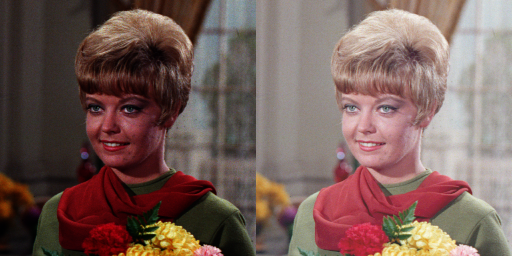

In [22]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/PCVK/female.tiff'
ori = cv.imread(path)
gamma_correction = np.zeros(ori.shape, ori.dtype)

for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):
      gamma_correction[y,x,c] = np.clip(255 * pow  (ori[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((ori, gamma_correction))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth
    Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

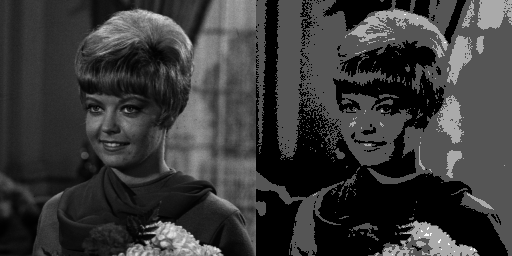

In [23]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul average denoising
Buat modul Average Denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Average dengan 5 foto
PNSR with rumus modul sebanyak 5 = 27.535479880846733
PNSR with library sebanyak 5 = 19.535705896752503


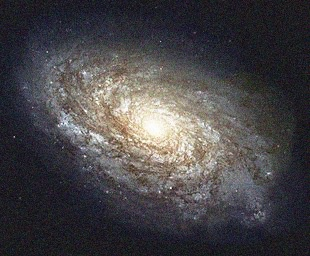

Average dengan 10 foto
PNSR with rumus modul sebanyak 10 = 27.542581623991808
PNSR with library sebanyak 10 = 19.73210455705756


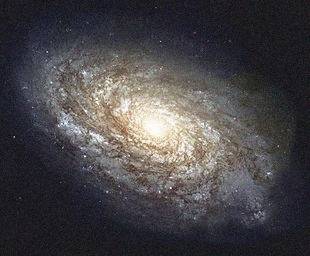

Average dengan 20 foto
PNSR with rumus modul sebanyak 20 = 27.51608611419238
PNSR with library sebanyak 20 = 19.84001660420628


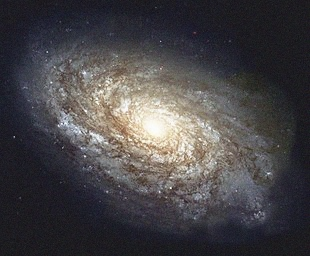

Average dengan 40 foto
PNSR with rumus modul sebanyak 40 = 27.4591760346727
PNSR with library sebanyak 40 = 19.893348831653604


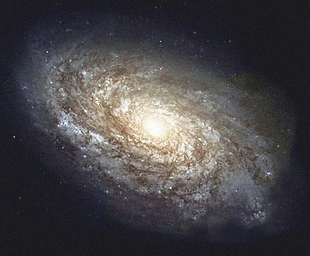

Average dengan 80 foto
PNSR with rumus modul sebanyak 80 = 27.39338335654943
PNSR with library sebanyak 80 = 19.91865573614663


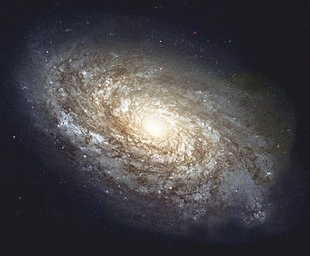

Average dengan 100 foto
PNSR with rumus modul sebanyak 100 = 27.370931279516654
PNSR with library sebanyak 100 = 19.92196095594035


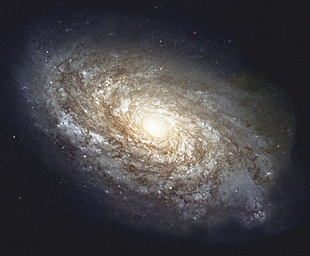

In [24]:
import glob
import matplotlib.pyplot as plt
cv_img = []
def PSNR(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

ref = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')


for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

itteration =  [5,10,20,40,80,100]
cv_img = np.array(cv_img)

for i in itteration:
  res =  np.uint8(np.mean(cv_img[:i],axis=0))
  print(f"Average dengan {i} foto")
  print(f"PNSR with rumus modul sebanyak {i} = {PSNR(ref,res)}")
  print(f"PNSR with library sebanyak {i} = {cv.PSNR(ref,res)}")
  cv2_imshow(res)

Penggunaan rumus yang tertera pada modul mengalami sedikit kejanggalan karena hasil PSNR yang dihasilkan tidak konsisten dan fluktuatif. Secara teori, apabila semakin banyak gambar yang digunakan, maka seharusnya noise pada gambar semakin berkurang dan nilai PSNR semakin besar. Jika menggunakan fungsi PSNR dari library cv2, maka hasilnya akan benar sesuai dengan teori.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

In [25]:
def mask_image(image,center,radius,operator):
  mask = np.zeros_like(image)
  cv.circle(mask, center, radius, (255, 255, 255), -1)
  match operator:
    case 'and':
      masked_image = cv.bitwise_and(image,mask)
    case 'or':
      masked_image = cv.bitwise_or(image,mask)
    case 'xor':
      masked_image = cv.bitwise_xor(image,mask)
    case 'not':
      masked_image = cv.bitwise_not(image,mask)
    case 'nand':
      inverted_mask = cv.bitwise_not(mask)
      masked_image = cv.bitwise_and(image,inverted_mask)

  final_frame = cv.hconcat((image, mask,masked_image))
  cv2_imshow(final_frame)

def mask_image_res(image,center,radius,operator):
  mask = np.zeros_like(image)
  cv.circle(mask, center, radius, (255, 255, 255), -1)
  match operator:
    case 'and':
      masked_image = cv.bitwise_and(image,mask)
    case 'or':
      masked_image = cv.bitwise_or(image,mask)
    case 'xor':
      masked_image = cv.bitwise_xor(image,mask)
    case 'not':
      masked_image = cv.bitwise_not(image,mask)
    case 'nand':
      inverted_mask = cv.bitwise_not(mask)
      masked_image = cv.bitwise_and(image,inverted_mask)

  final_frame = cv.hconcat((image,masked_image))
  cv2_imshow(final_frame)





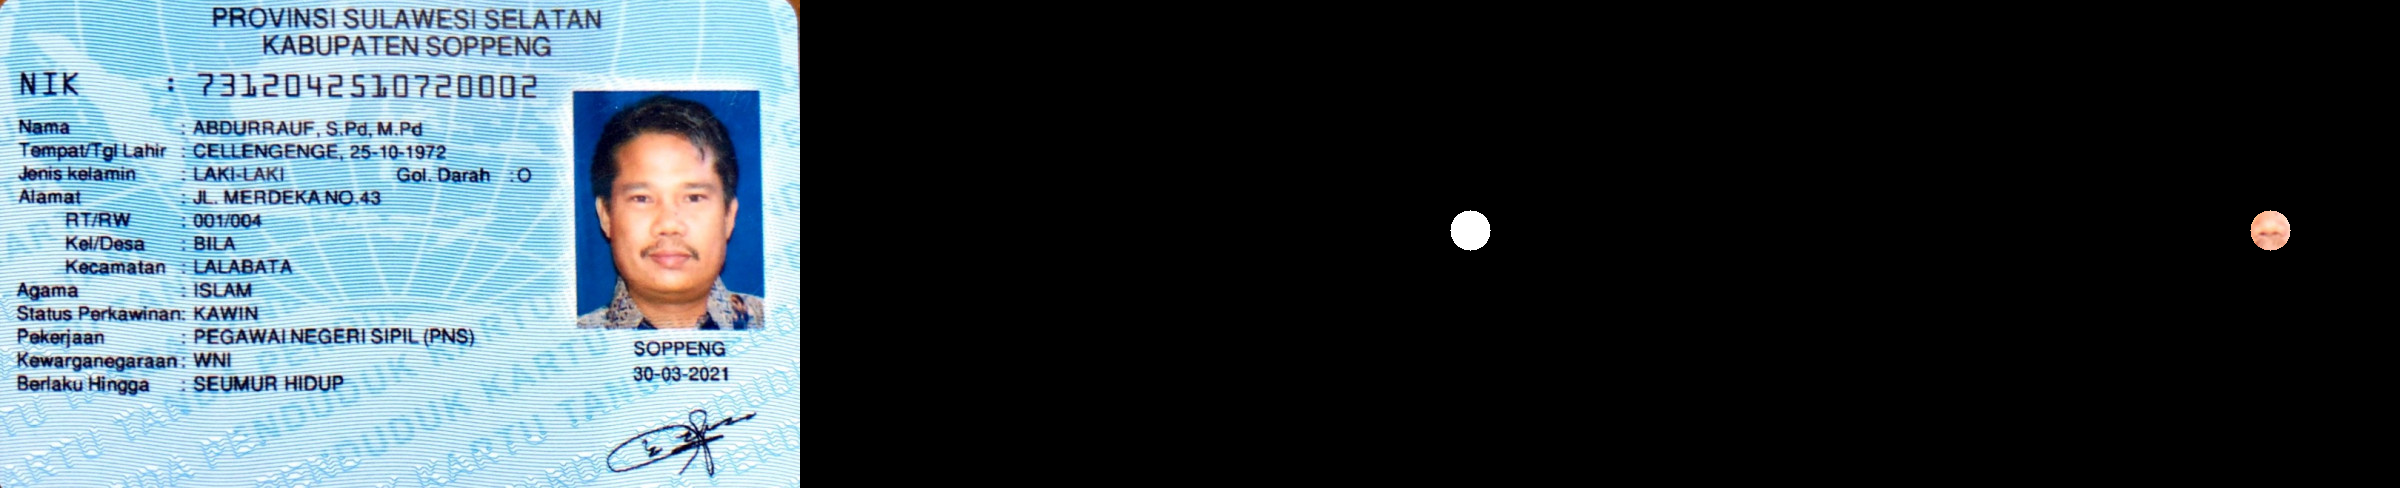

In [26]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
mask_image(ktp,(670,230),20,'and')

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

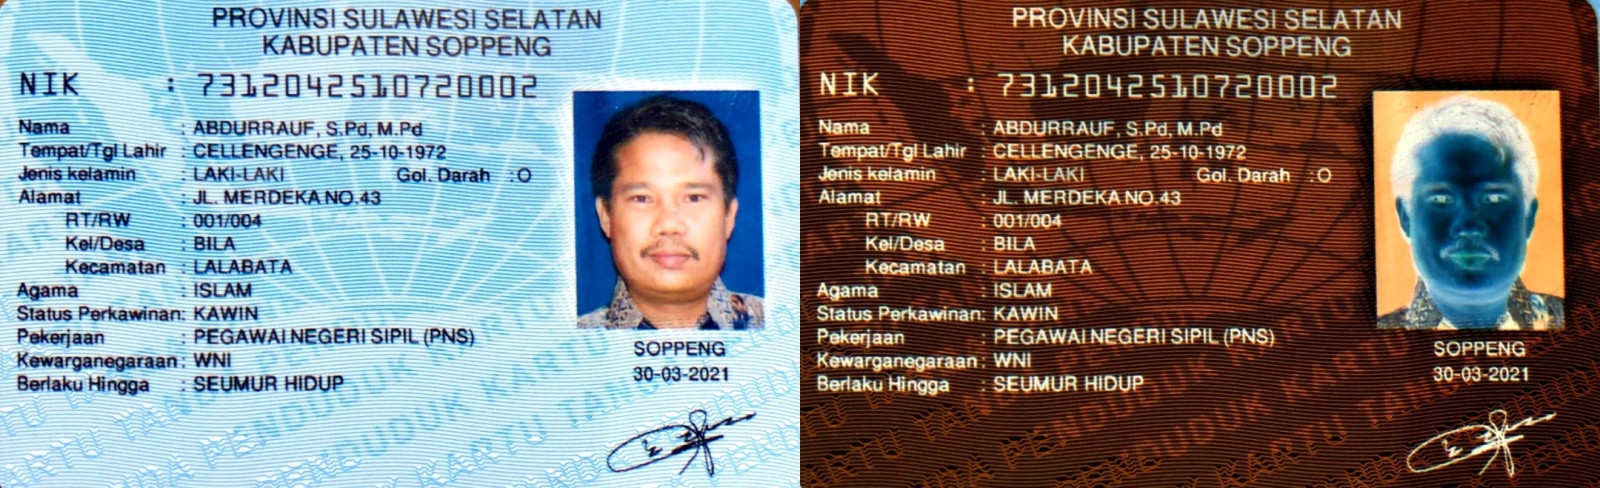

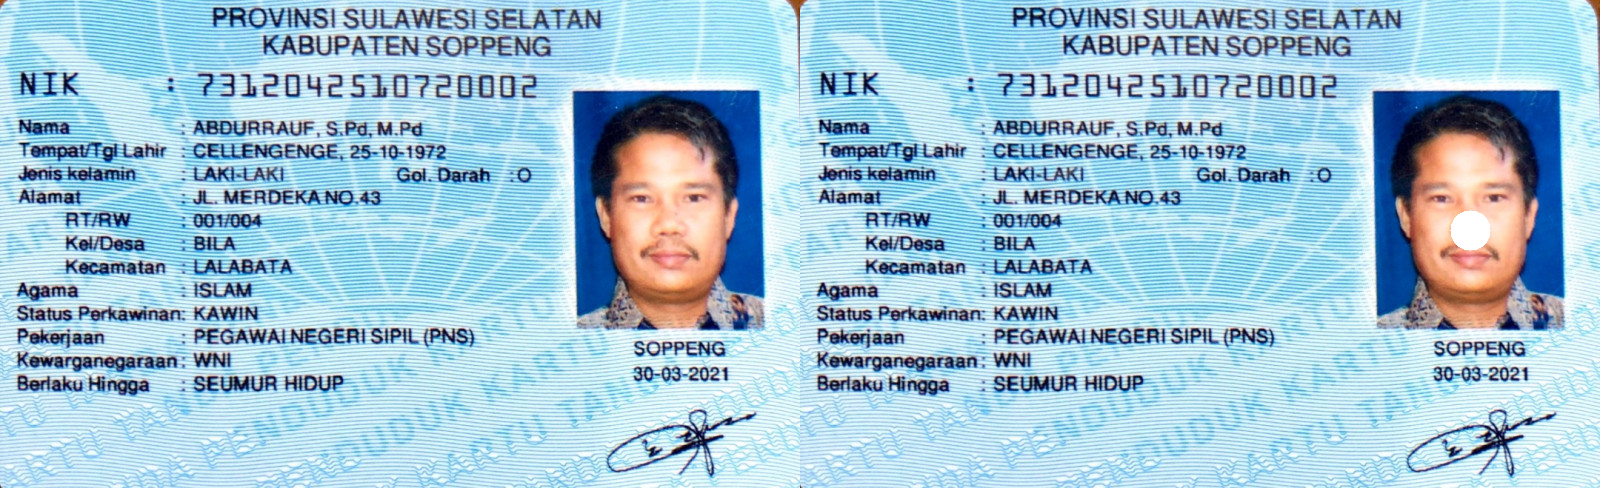

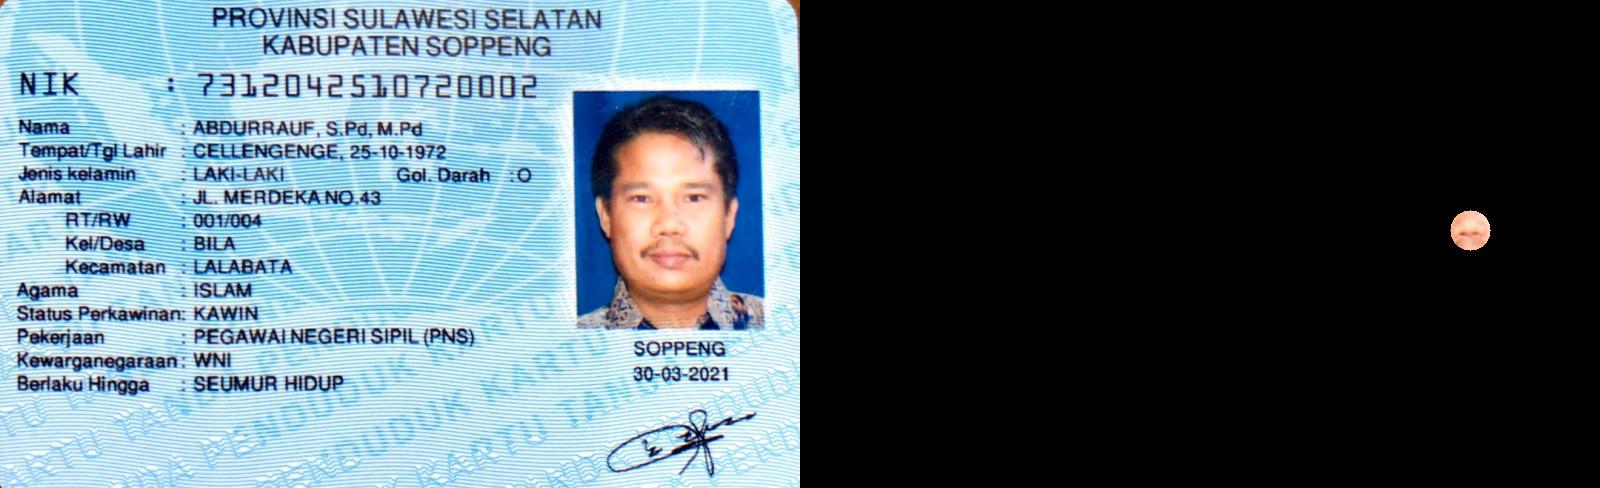

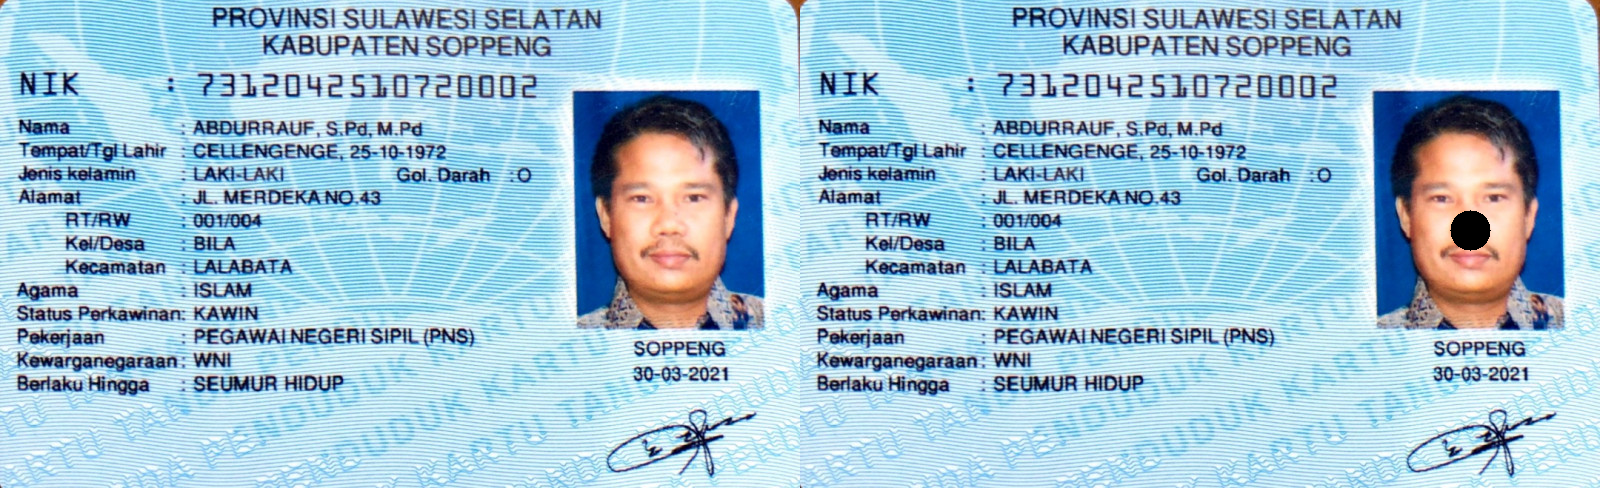

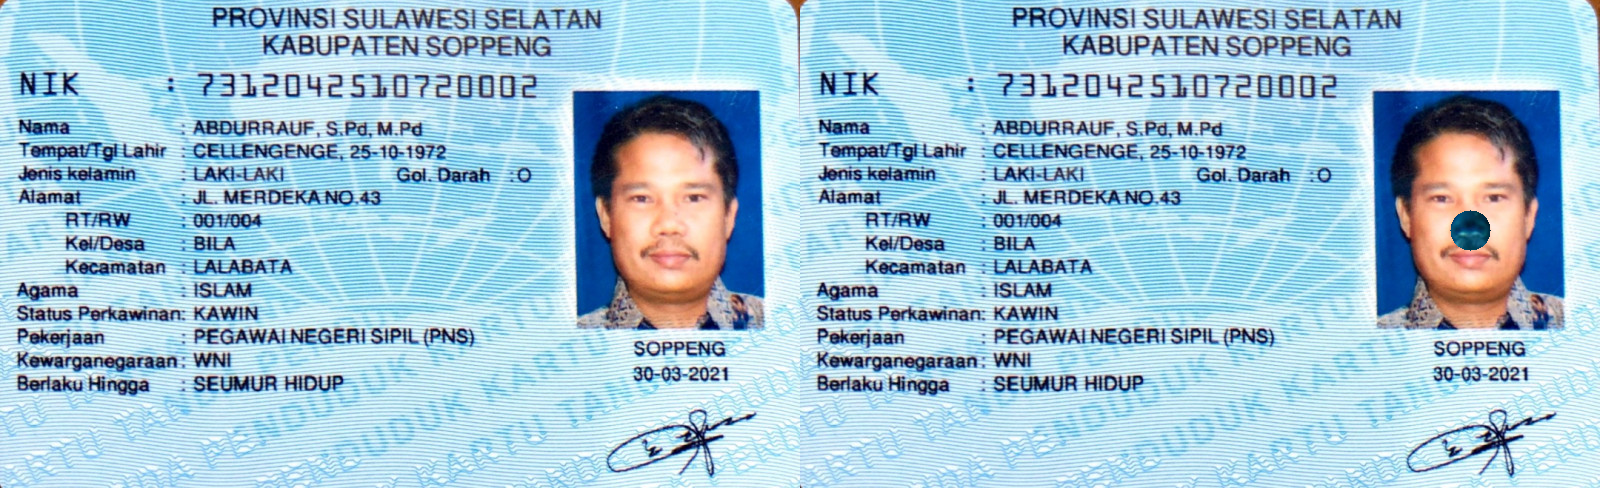

In [27]:
mask_image_res(ktp,(670,230),20,'not')
mask_image_res(ktp,(670,230),20,'or')
mask_image_res(ktp,(670,230),20,'and')
mask_image_res(ktp,(670,230),20,'nand')
mask_image_res(ktp,(670,230),20,'xor')

Proses masking dapat dilakukan dengan perbandingan operator pada gambar sumber (yang ingin dimasking) sama target. Kode biner yang terletak pada sumber dibandingkan dengan target. Contoh, 1110011 && 1001001 maka hasil akhir dari gambar adalah 1000101. Gambar sumber akan ditampilkan hanya pada posisi pixel yang bernilai true sehingga gambar seolah - olah terpotong